### Problem Statement:
Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_train=pd.read_csv('MPCtrain.csv')
df_test=pd.read_csv('MPCtest.csv')
df=pd.concat([df_train,df_test]).reset_index(drop=True)

In [3]:
df.tail(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,id
2990,1807,0,1.2,0,4,0,37,0.8,162,1,...,932,2741,7,1,9,1,1,1,NaN,991.0
2991,1797,1,2.6,0,4,0,42,0.6,174,3,...,1169,3359,16,6,18,1,1,1,NaN,992.0
2992,1895,0,0.5,1,0,1,62,0.9,99,2,...,1698,2563,10,8,13,1,0,1,NaN,993.0
2993,567,1,2.7,1,14,1,56,0.4,165,8,...,1290,336,7,6,7,1,1,1,NaN,994.0
2994,936,1,1.4,1,0,0,46,0.8,139,2,...,886,684,8,5,12,1,1,1,NaN,995.0
2995,1700,1,1.9,0,0,1,54,0.5,170,7,...,913,2121,14,8,15,1,1,0,NaN,996.0
2996,609,0,1.8,1,0,0,13,0.9,186,4,...,1632,1933,8,1,19,0,1,1,NaN,997.0
2997,1185,0,1.4,0,1,1,8,0.5,80,1,...,825,1223,5,0,14,1,0,0,NaN,998.0
2998,1533,1,0.5,1,0,0,50,0.4,171,2,...,832,2509,15,11,6,0,1,0,NaN,999.0
2999,1270,1,0.5,0,4,1,35,0.1,140,6,...,608,2828,9,2,3,1,0,1,NaN,1000.0


In [4]:
df.isnull().sum()

battery_power       0
blue                0
clock_speed         0
dual_sim            0
fc                  0
four_g              0
int_memory          0
m_dep               0
mobile_wt           0
n_cores             0
pc                  0
px_height           0
px_width            0
ram                 0
sc_h                0
sc_w                0
talk_time           0
three_g             0
touch_screen        0
wifi                0
price_range      1000
id               2000
dtype: int64

In [5]:
df.drop('id',inplace=True,axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  3000 non-null   int64  
 1   blue           3000 non-null   int64  
 2   clock_speed    3000 non-null   float64
 3   dual_sim       3000 non-null   int64  
 4   fc             3000 non-null   int64  
 5   four_g         3000 non-null   int64  
 6   int_memory     3000 non-null   int64  
 7   m_dep          3000 non-null   float64
 8   mobile_wt      3000 non-null   int64  
 9   n_cores        3000 non-null   int64  
 10  pc             3000 non-null   int64  
 11  px_height      3000 non-null   int64  
 12  px_width       3000 non-null   int64  
 13  ram            3000 non-null   int64  
 14  sc_h           3000 non-null   int64  
 15  sc_w           3000 non-null   int64  
 16  talk_time      3000 non-null   int64  
 17  three_g        3000 non-null   int64  
 18  touch_sc

### Visualisation

#### Battery_power Distribution

<Axes: xlabel='battery_power', ylabel='Count'>

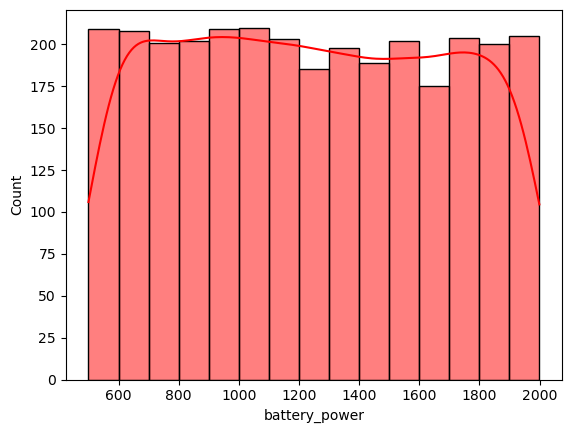

In [7]:
sns.histplot(x='battery_power', data=df, kde=True, color='red')

#### n_cores and clock-speed

/var/folders/vz/32zjh7mn0jx90p4xh4ntn2_80000gn/T/ipykernel_6020/2208434939.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='n_cores', y='clock_speed', data=df,palette='viridis')


<Axes: xlabel='n_cores', ylabel='clock_speed'>

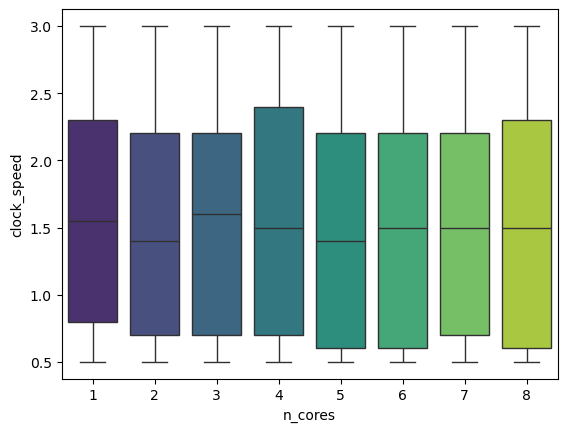

In [8]:
sns.boxplot(x='n_cores', y='clock_speed', data=df,palette='viridis')

#### Observations:
1. By seeing boxplot we clearly say that clock-speed don't have any outliners.
2. Median of clock-speeds for different cores is clearly lie between 1 to 2.

#### Correlation Heatmap

<Axes: >

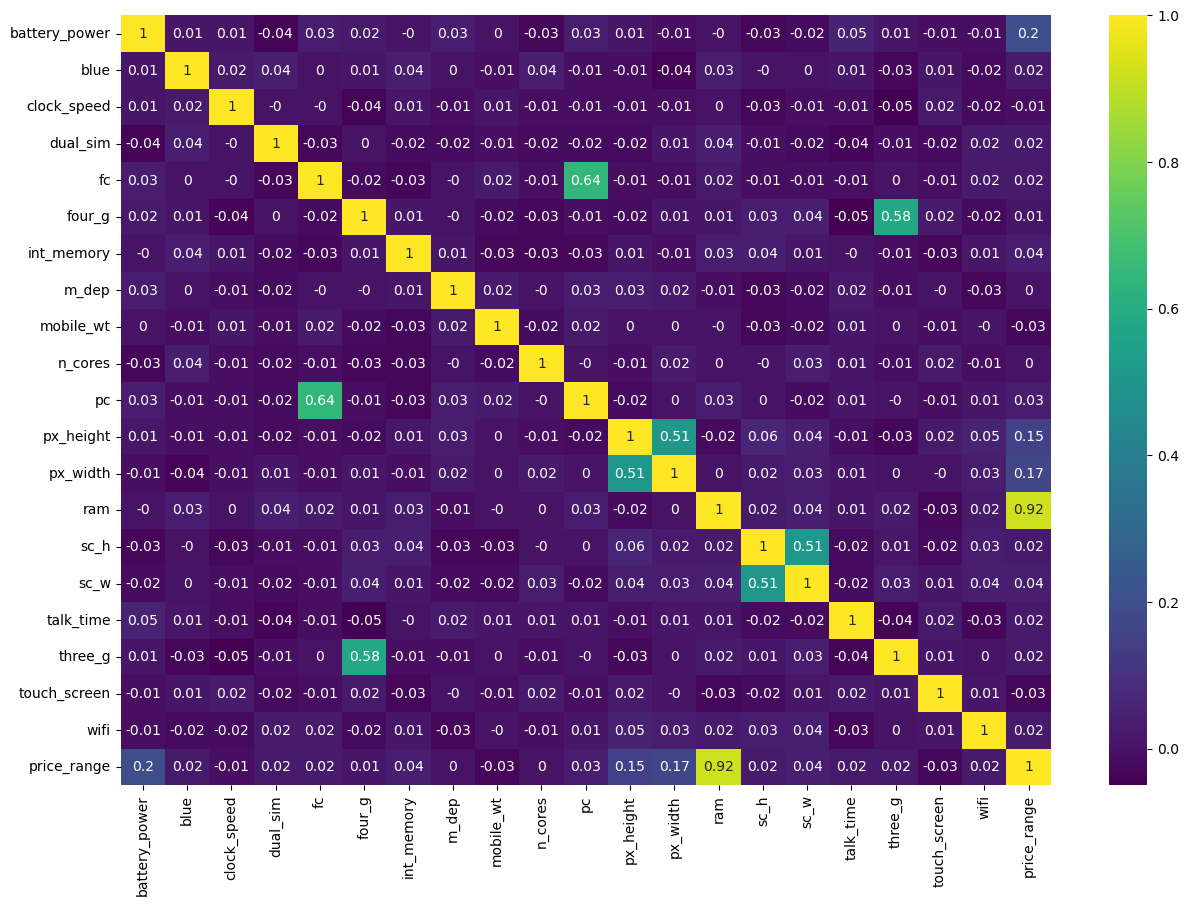

In [9]:
plt.figure(figsize=(15,10))
sns.heatmap(df_train.corr().round(2), cmap='viridis', annot=True)

#### Observations:
1. Almost every features have very minute or 0 correlation to each other except some.
2. (pc and fc) and (3g and 4g) have good correlation with each other.

In [10]:
df[['blue','four_g','three_g','n_cores','touch_screen','wifi','dual_sim','price_range']]=df[['blue','four_g','three_g','n_cores','touch_screen','wifi','dual_sim','price_range']].astype('category')

#### Count plot for 3g and 4g

/var/folders/vz/32zjh7mn0jx90p4xh4ntn2_80000gn/T/ipykernel_6020/3750738946.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='three_g', y='count', data=df_3g, palette='viridis')
/var/folders/vz/32zjh7mn0jx90p4xh4ntn2_80000gn/T/ipykernel_6020/3750738946.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='four_g', y='count', data=df_4g, palette='viridis')
/var/folders/vz/32zjh7mn0jx90p4xh4ntn2_80000gn/T/ipykernel_6020/3750738946.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='3g_4g_combination', y='count', data=df_3g_4g, palett

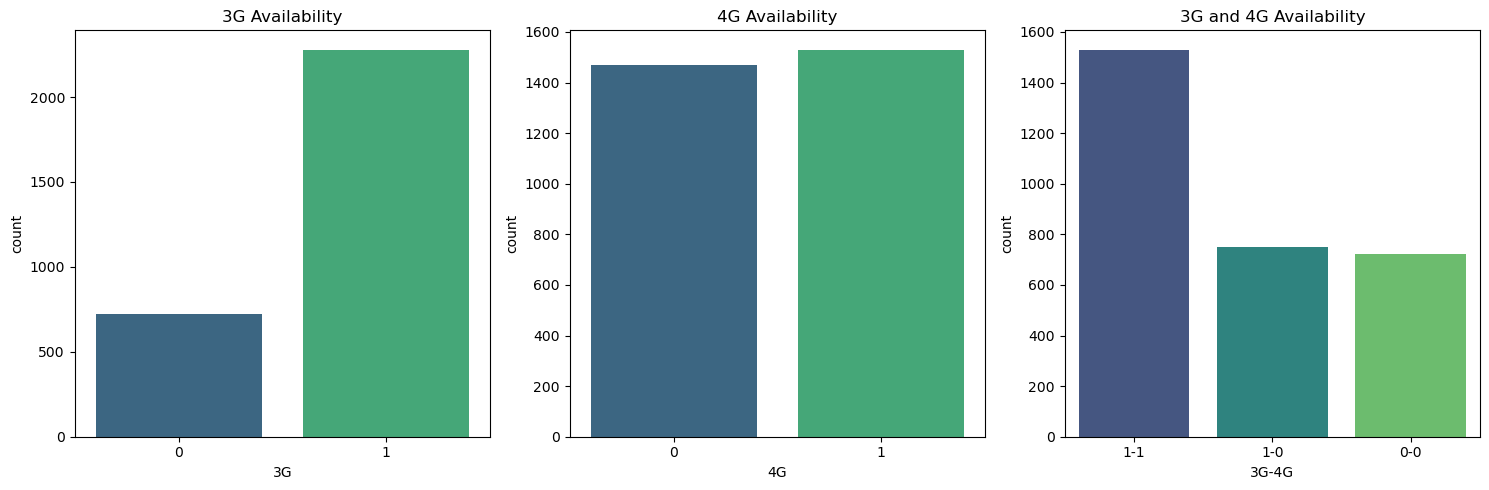

In [11]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
df_3g = pd.DataFrame(df['three_g'].value_counts()).reset_index()
df_3g.columns = ['three_g', 'count']
sns.barplot(x='three_g', y='count', data=df_3g, palette='viridis')
plt.xlabel('3G')
plt.title('3G Availability')

plt.subplot(1, 3, 2)
df_4g = pd.DataFrame(df['four_g'].value_counts()).reset_index()
df_4g.columns = ['four_g', 'count'] 
sns.barplot(x='four_g', y='count', data=df_4g, palette='viridis')
plt.xlabel('4G')
plt.title('4G Availability')

plt.subplot(1, 3, 3)
df_3g_4g = df['three_g'].astype(str) + '-' + df['four_g'].astype(str)
df_3g_4g = pd.DataFrame(df_3g_4g.value_counts()).reset_index()
df_3g_4g.columns = ['3g_4g_combination', 'count']  # Rename columns for clarity
sns.barplot(x='3g_4g_combination', y='count', data=df_3g_4g, palette='viridis')
plt.xlabel('3G-4G')
plt.title('3G and 4G Availability')

plt.tight_layout()
plt.show()

#### Observations:
1. As expected if any device have 4G then it must have 3G.
2. Most of the phones have both 3G and 4G.
3. 600-800 phones still have neither any of 3G or 4G.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   battery_power  3000 non-null   int64   
 1   blue           3000 non-null   category
 2   clock_speed    3000 non-null   float64 
 3   dual_sim       3000 non-null   category
 4   fc             3000 non-null   int64   
 5   four_g         3000 non-null   category
 6   int_memory     3000 non-null   int64   
 7   m_dep          3000 non-null   float64 
 8   mobile_wt      3000 non-null   int64   
 9   n_cores        3000 non-null   category
 10  pc             3000 non-null   int64   
 11  px_height      3000 non-null   int64   
 12  px_width       3000 non-null   int64   
 13  ram            3000 non-null   int64   
 14  sc_h           3000 non-null   int64   
 15  sc_w           3000 non-null   int64   
 16  talk_time      3000 non-null   int64   
 17  three_g        3000 non-null   ca

#### Dependency of talk_time and battery_power with respect to n_cores

In [13]:
df['talk_time'].unique()

array([19,  7,  9, 11, 15, 10, 18,  5, 20, 12, 13,  2,  4,  3, 16,  6, 14,
       17,  8])

<Axes: xlabel='talk_time', ylabel='battery_power'>

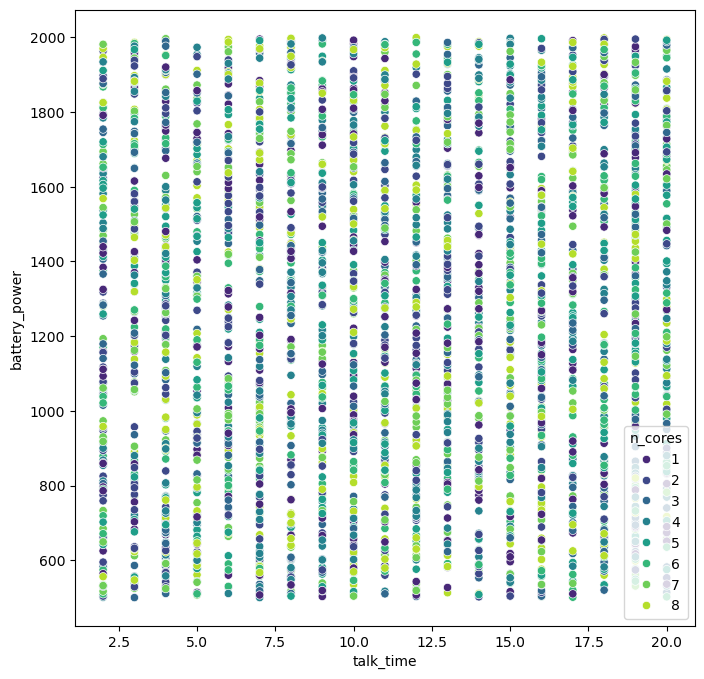

In [14]:
plt.figure(figsize=(8,8))
sns.scatterplot(y='battery_power',x='talk_time',hue='n_cores',data=df,palette='viridis')

In [15]:
df_train_preprocessed = df[:2000]
df_test_preprocessed = df[2000:]

In [16]:
inputs=df_train_preprocessed.copy().drop('price_range',axis=1)
targets=df_train_preprocessed.copy()['price_range']

In [17]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector,make_column_transformer
from sklearn.preprocessing import StandardScaler
preprocessing=make_column_transformer(
    (StandardScaler(),make_column_selector(dtype_include=np.number))
)
inputs_scaled=preprocessing.fit_transform(inputs)

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=42)

#### 1. Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [20]:
y_log_pred=log_reg.predict(x_test)

In [21]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_log_pred)

In [22]:
results_table=pd.DataFrame([['Logistic Regression',accuracy]],columns=['Model','Accuracy_score'])

#### 2. Ridge Classification

In [23]:
from sklearn.linear_model import RidgeClassifier
ridge=RidgeClassifier()
ridge.fit(x_train,y_train)

RidgeClassifier()

In [24]:
y_ridge_pred=ridge.predict(x_test)

In [25]:
accuracy1=accuracy_score(y_test,y_ridge_pred)
results_table1=pd.DataFrame([['RidgeClassifier',accuracy1]],columns=['Model','Accuracy_score'])
results_table=pd.concat([results_table,results_table1],ignore_index=True)

#### 3. Lasso Classification

In [26]:
lasso=LogisticRegression(penalty='l1', solver='saga')
lasso.fit(x_train,y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='l1', solver='saga')

In [27]:
y_lasso_pred=lasso.predict(x_test)

In [28]:
accuracy2=accuracy_score(y_test,y_lasso_pred)
results_table2=pd.DataFrame([['LassoClassifier',accuracy2]],columns=['Model','Accuracy_score'])
results_table=pd.concat([results_table,results_table2],ignore_index=True)

#### 4. SGD Classifier

In [29]:
from sklearn.linear_model import SGDClassifier
SGD=SGDClassifier()
SGD.fit(x_train,y_train)

SGDClassifier()

In [30]:
y_SGD_predict=SGD.predict(x_test)

In [31]:
accuracy3=accuracy_score(y_test,y_SGD_predict)

In [32]:
results_table3=pd.DataFrame([['SGD',accuracy3]],columns=['Model','Accuracy_score'])
results_table=pd.concat([results_table,results_table3],ignore_index=True)

#### 5. Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [34]:
y_DT_predict=DT.predict(x_test)

In [35]:
accuracy4=accuracy_score(y_test,y_DT_predict)

In [36]:
results_table4=pd.DataFrame([['Decision Tree',accuracy4]],columns=['Model','Accuracy_score'])
results_table=pd.concat([results_table,results_table4],ignore_index=True)

#### 6. Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(x_train,y_train)

RandomForestClassifier()

In [38]:
y_RF_predict=RF.predict(x_test)

In [39]:
accuracy5=accuracy_score(y_test,y_RF_predict)
accuracy5

0.8925

In [40]:
results_table5=pd.DataFrame([['Random Forest',accuracy5]],columns=['Model','Accuracy_score'])
results_table=pd.concat([results_table,results_table5],ignore_index=True)

#### 7. SVM Classifier

In [41]:
from sklearn.svm import SVC
SVM_class=SVC(kernel='sigmoid')
SVM_class.fit(x_train,y_train)

SVC(kernel='sigmoid')

In [42]:
y_SVC_predict=SVM_class.predict(x_test)

In [43]:
accuracy6=accuracy_score(y_test,y_SVC_predict)
accuracy6

0.895

In [44]:
results_table6=pd.DataFrame([['SVM Classifier',accuracy6]],columns=['Model','Accuracy_score'])
results_table=pd.concat([results_table,results_table6],ignore_index=True)

In [45]:
results_table=results_table.sort_values(by='Accuracy_score')
results_table['Accuracy_score']=results_table['Accuracy_score'].round(3)

In [46]:
results_table=results_table.reset_index(drop=True)
results_table

,Model,Accuracy_score
0,RidgeClassifier,0.632
1,SGD,0.788
2,Decision Tree,0.855
3,Random Forest,0.892
4,SVM Classifier,0.895
5,Logistic Regression,0.985
6,LassoClassifier,0.985


#### Observations :
1. From all of above models **LassoClassifier** and **Logistic Regression** is best performer.
2. But I will going with lasso because it also perform feature selection.

#### Fine-Tuning the model

In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=2, n_jobs=-1)
grid_search.fit(x_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max

GridSearchCV(cv=2, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [48]:
y_pred_logCV=grid_search.predict(x_test)

In [49]:
accuracy_final=accuracy_score(y_test,y_pred_logCV)

In [50]:
accuracy_final

0.985

In [52]:
grid_search.best_params_


{'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}

## Conclusion : 
### By using these model's I am finally able to reach accuracy of 98.5% .